In [3]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('./archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Replace these values with your actual database information
hostname = "gator3228.hostgator.com"
username = "rbrennan_sm_bcd"
password = "This_is_not_the_password"
database = "rbrennan_stock_project_4"
# Create a database connection
db_url = f"mysql+mysqlconnector://{username}:{password}@{hostname}/{database}"
engine = create_engine(db_url)
# Test the connection
try:
    conn = engine.connect()
    print("Connected to MySQL database")
except Exception as e:
    print("Error:", e)
net_data = pd.read_sql("SELECT * FROM Netflix", conn)


Exception during reset or similar
Traceback (most recent call last):
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\pool\base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\engine\default.py", line 682, in do_rollback
    dbapi_connection.rollback()
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\mysql\connector\connection_cext.py", line 517, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Lost connection to MySQL server during query


Connected to MySQL database


In [31]:
net_data.head(10)

,Date,Open,High,Low,Close,Volume
0,2018-02-20,277.739990,285.809998,276.609985,278.549988,7769000
1,2018-02-21,282.070007,286.640015,280.010010,281.040009,9371100
2,2018-02-22,283.880005,284.500000,274.450012,278.140015,8891500
3,2018-02-23,281.000000,286.000000,277.809998,285.929993,7301800
4,2018-02-26,288.750000,295.649994,287.010010,294.160004,10268600
5,2018-02-27,294.769989,297.359985,290.589996,290.609985,9416500
6,2018-02-28,293.100006,295.750000,290.779999,291.380005,7653500
7,2018-03-01,292.750000,295.250000,283.829987,290.390015,11932100
8,2018-03-02,284.649994,301.179993,283.230011,301.049988,13345300
9,2018-03-05,302.850006,316.910004,297.600006,315.000000,18986100


In [32]:
net_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [34]:
missing_values = net_data.isnull().sum()
print(missing_values)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [35]:
net_info = net_data.info()
print(net_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1404 non-null   datetime64[ns]
 1   Open    1404 non-null   float64       
 2   High    1404 non-null   float64       
 3   Low     1404 non-null   float64       
 4   Close   1404 non-null   float64       
 5   Volume  1404 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.9 KB
None


In [37]:
summary_stats = net_data.describe().T
print(summary_stats)

         count          mean           std           min           25%  \
Open    1404.0  3.894075e+02  1.125745e+02  1.639600e+02  3.110600e+02   
High    1404.0  3.955367e+02  1.132316e+02  1.720600e+02  3.168000e+02   
Low     1404.0  3.830407e+02  1.115580e+02  1.627100e+02  3.056400e+02   
Close   1404.0  3.894229e+02  1.123143e+02  1.663700e+02  3.122175e+02   
Volume  1404.0  7.987430e+06  6.610481e+06  1.144000e+06  4.400800e+06   

                 50%           75%           max  
Open    3.636200e+02  4.873425e+02  6.923500e+02  
High    3.688900e+02  4.935875e+02  7.009900e+02  
Low     3.580600e+02  4.806700e+02  6.860900e+02  
Close   3.636250e+02  4.868825e+02  6.916900e+02  
Volume  6.261300e+06  9.513850e+06  1.333875e+08  


In [38]:
net_data['Date'] = pd.to_datetime(net_data['Date'])

<Axes: >

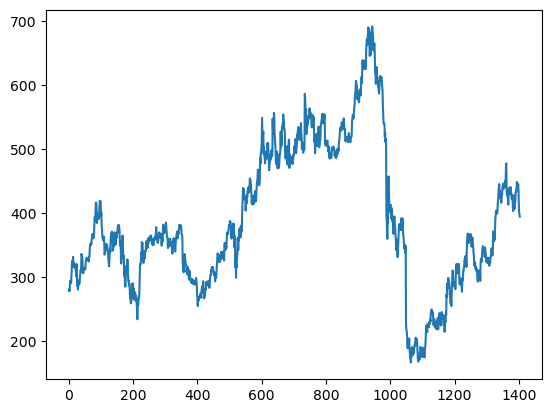

In [39]:
net_data['Close'].plot()

In [40]:
net_data['50_day_MA'] = net_data['Close'].rolling(window=50).mean()

In [41]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculate RSI for the entire DataFrame
net_data['RSI'] = calculate_rsi(net_data)

In [42]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', '50_day_MA']
target = 'Close'

# Split data into train and test sets
train_data, test_data = train_test_split(net_data, test_size=0.2, shuffle=False)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
arima_model =ARIMA(train_data[target], order=(5, 1, 1))

arima_fit = arima_model.fit()

In [45]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(mse)

15644.004248107545


Text(0.5, 1.0, 'Actual vs. Predicted Prices')

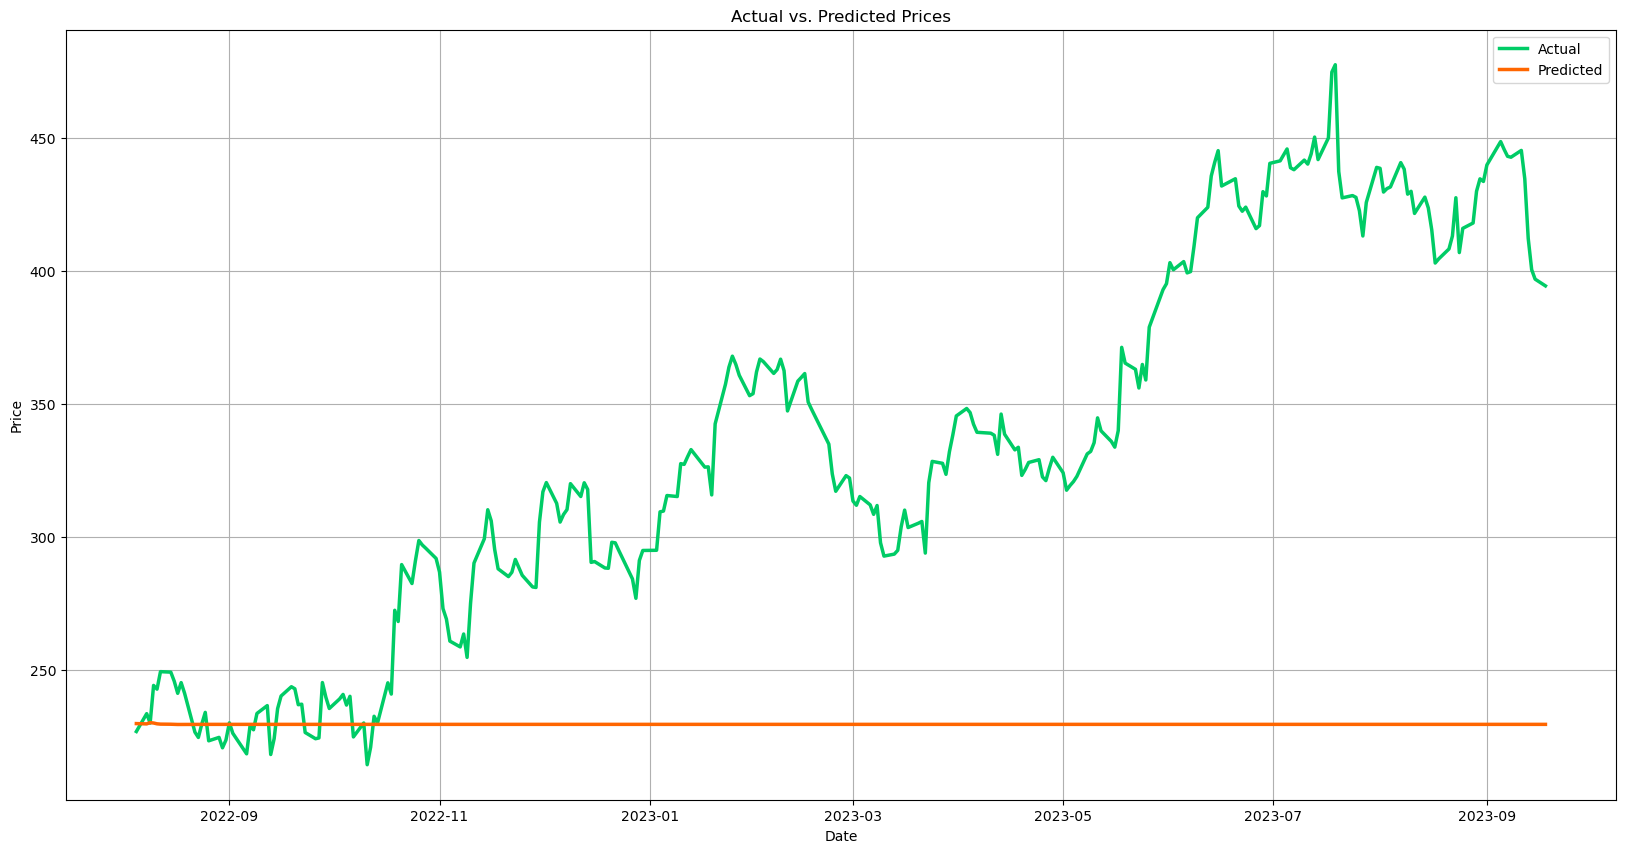

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(test_data['Date'], test_data[target], label='Actual', color="#00cc66", linewidth='2.5')   
plt.plot(test_data['Date'], predictions, label='Predicted', color="#ff6600", linewidth='2.5')
plt.grid(True)   
plt.legend()                                                     
plt.xlabel('Date')                                             
plt.ylabel('Price')                                       
plt.title('Actual vs. Predicted Prices')    

In [47]:
import xgboost as xgb

# variables and features
features = ['Open', 'High', 'Low', 'Volume', '50_day_MA', 'RSI']
target = 'Close'

# create DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# xgboost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 30,
    'learning_rate': 0.3
}

# train xgboost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)

In [49]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)
print(mse_xgb)

39.403819132667586


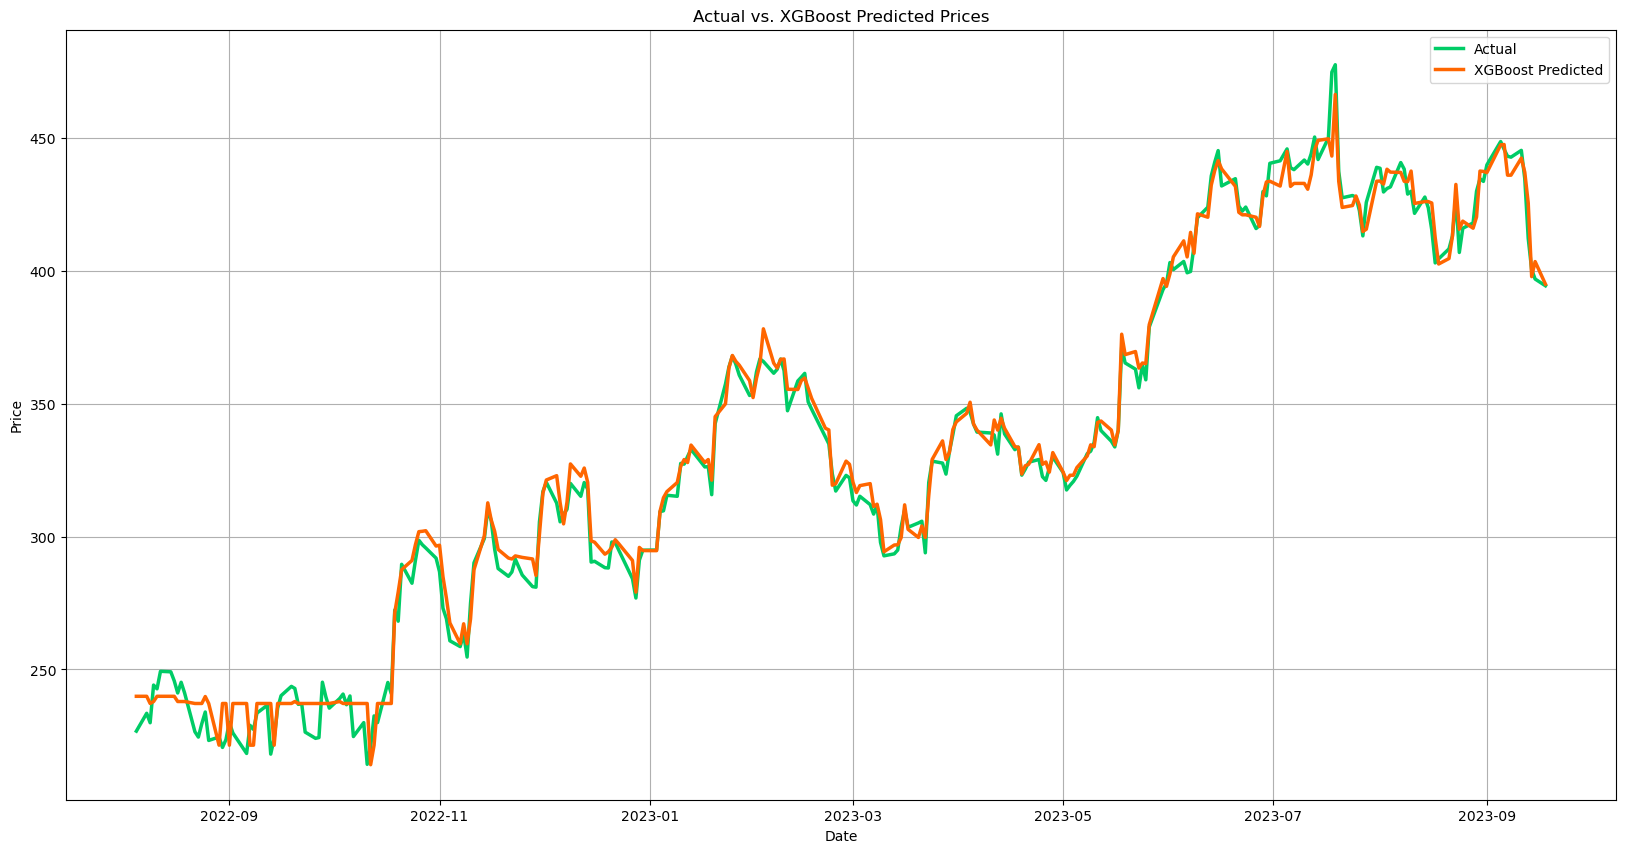

In [54]:
plt.figure(figsize=(20,10))
plt.plot(test_data['Date'], test_data[target], label='Actual', color="#00cc66", linewidth='2.5')
plt.plot(test_data['Date'], xgb_predictions, label='XGBoost Predicted', color="#ff6600", linewidth='2.5')
plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. XGBoost Predicted Prices')
plt.show()